<a href="https://colab.research.google.com/github/sulaiman01626/Vehicle-detection-and-classification-model/blob/main/Vehicle_Detection_%26_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving unnamed.png to unnamed (2).png
Uploaded file name: unnamed (2).png

0: 640x640 6 persons, 22 cars, 1 motorcycle, 6 buss, 1 truck, 1 traffic light, 1 backpack, 2 handbags, 245.3ms
Speed: 8.8ms preprocess, 245.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


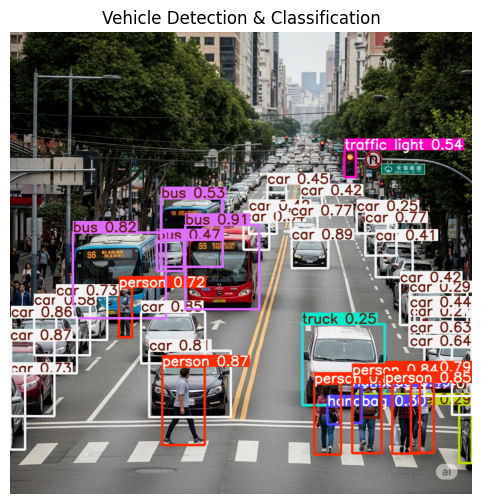

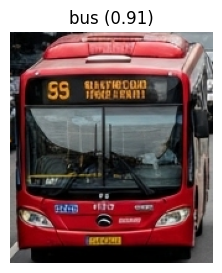

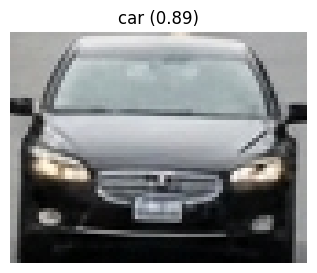

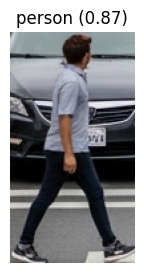

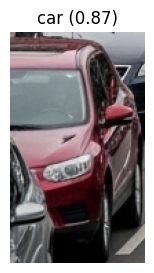

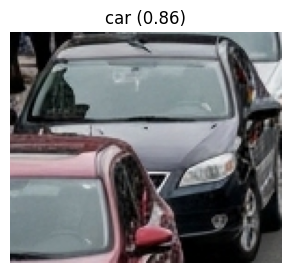

Only showing first 5 detections...


In [39]:
from google.colab import files
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Uploaded file name:", img_path)

# Step 2: Load YOLOv8 model
model = YOLO('yolov8n.pt')  # You can use yolov8s.pt or yolov8m.pt for better accuracy

# Step 3: Read and convert image
img = cv2.imread(img_path)
if img is None:
    print("Error: Could not load image. Check the path!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Step 4: Run object detection
    results = model(img_rgb)

    # Step 5: Display annotated image with bounding boxes
    annotated_img = results[0].plot()
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.title("Vehicle Detection & Classification")
    plt.show()

    # Step 6: Crop each detected box and display
    height, width, _ = img_rgb.shape
    boxes = results[0].boxes  # all detected bounding boxes

    max_images = 5  # Show only first 5 cropped detections

    for i, box in enumerate(boxes):
        if i >= max_images:
            print("Only showing first 5 detections...")
            break

        # Convert coordinates and clamp within image size
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = int(max(0, x1)), int(max(0, y1)), int(min(width, x2)), int(min(height, y2))

        # Skip small crops
        if (x2 - x1) < 20 or (y2 - y1) < 20:
            print(f"Skipped very small crop {i}")
            continue

        # Crop the image from the original RGB
        cropped_img = img_rgb[y1:y2, x1:x2]

        # Show cropped image
        plt.figure(figsize=(4, 3))
        plt.imshow(cropped_img)
        plt.axis('off')

        # Get class and confidence score
        cls_id = int(box.cls[0])
        conf = box.conf[0]
        class_name = model.names[cls_id]

        plt.title(f"{class_name} ({conf:.2f})")
        plt.show()